## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49ms	remaining: 48.9s
1:	learn: 0.9301086	total: 51.2ms	remaining: 25.5s
2:	learn: 0.9005637	total: 53.2ms	remaining: 17.7s
3:	learn: 0.8720983	total: 55.3ms	remaining: 13.8s
4:	learn: 0.8467410	total: 57.3ms	remaining: 11.4s
5:	learn: 0.8226672	total: 59.2ms	remaining: 9.81s
6:	learn: 0.7994702	total: 61.3ms	remaining: 8.7s
7:	learn: 0.7784272	total: 63.3ms	remaining: 7.85s
8:	learn: 0.7602192	total: 65.7ms	remaining: 7.24s
9:	learn: 0.7412421	total: 68ms	remaining: 6.73s
10:	learn: 0.7247930	total: 70.3ms	remaining: 6.32s
11:	learn: 0.7089951	total: 72.2ms	remaining: 5.95s
12:	learn: 0.6951345	total: 74.1ms	remaining: 5.63s
13:	learn: 0.6809276	total: 76ms	remaining: 5.35s
14:	learn: 0.6692630	total: 78.1ms	remaining: 5.13s
15:	learn: 0.6588323	total: 80ms	remaining: 4.92s
16:	learn: 0.6472700	total: 81.8ms	remaining: 4.73s
17:	learn: 0.6379982	total: 83.8ms	remaining: 4.57s
18:	learn: 0.6294674	total: 85.7ms	remaining: 4.43s
19:	learn: 0.6193295	total: 87.

52:	learn: 0.4928924	total: 152ms	remaining: 2.72s
53:	learn: 0.4917272	total: 155ms	remaining: 2.71s
54:	learn: 0.4895079	total: 157ms	remaining: 2.69s
55:	learn: 0.4881884	total: 159ms	remaining: 2.68s
56:	learn: 0.4861566	total: 161ms	remaining: 2.66s
57:	learn: 0.4850201	total: 163ms	remaining: 2.64s
58:	learn: 0.4840055	total: 165ms	remaining: 2.63s
59:	learn: 0.4824455	total: 167ms	remaining: 2.61s
60:	learn: 0.4809744	total: 169ms	remaining: 2.6s
61:	learn: 0.4801376	total: 171ms	remaining: 2.58s
62:	learn: 0.4792422	total: 173ms	remaining: 2.56s
63:	learn: 0.4780719	total: 174ms	remaining: 2.55s
64:	learn: 0.4771984	total: 176ms	remaining: 2.54s
65:	learn: 0.4759610	total: 178ms	remaining: 2.52s
66:	learn: 0.4750287	total: 180ms	remaining: 2.51s
67:	learn: 0.4740093	total: 182ms	remaining: 2.5s
68:	learn: 0.4732612	total: 184ms	remaining: 2.48s
69:	learn: 0.4727266	total: 186ms	remaining: 2.47s
70:	learn: 0.4716549	total: 188ms	remaining: 2.46s
71:	learn: 0.4709088	total: 190ms

83:	learn: 0.4604376	total: 215ms	remaining: 2.34s
84:	learn: 0.4596603	total: 217ms	remaining: 2.33s
85:	learn: 0.4587835	total: 218ms	remaining: 2.32s
86:	learn: 0.4583577	total: 220ms	remaining: 2.31s
87:	learn: 0.4577999	total: 222ms	remaining: 2.3s
88:	learn: 0.4572657	total: 224ms	remaining: 2.3s
89:	learn: 0.4569360	total: 226ms	remaining: 2.29s
90:	learn: 0.4559969	total: 228ms	remaining: 2.28s
91:	learn: 0.4549716	total: 230ms	remaining: 2.27s
92:	learn: 0.4544919	total: 232ms	remaining: 2.27s
93:	learn: 0.4537693	total: 234ms	remaining: 2.26s
94:	learn: 0.4532673	total: 236ms	remaining: 2.25s
95:	learn: 0.4526987	total: 238ms	remaining: 2.24s
96:	learn: 0.4520952	total: 240ms	remaining: 2.23s
97:	learn: 0.4513919	total: 242ms	remaining: 2.23s
98:	learn: 0.4503747	total: 244ms	remaining: 2.22s
99:	learn: 0.4494783	total: 246ms	remaining: 2.21s
100:	learn: 0.4487329	total: 248ms	remaining: 2.21s
101:	learn: 0.4481325	total: 250ms	remaining: 2.2s
102:	learn: 0.4475445	total: 252

136:	learn: 0.4307446	total: 318ms	remaining: 2s
137:	learn: 0.4304464	total: 320ms	remaining: 2s
138:	learn: 0.4298257	total: 322ms	remaining: 1.99s
139:	learn: 0.4295800	total: 324ms	remaining: 1.99s
140:	learn: 0.4292928	total: 326ms	remaining: 1.98s
141:	learn: 0.4288053	total: 328ms	remaining: 1.98s
142:	learn: 0.4282748	total: 330ms	remaining: 1.97s
143:	learn: 0.4277528	total: 332ms	remaining: 1.97s
144:	learn: 0.4274087	total: 333ms	remaining: 1.97s
145:	learn: 0.4271984	total: 335ms	remaining: 1.96s
146:	learn: 0.4268458	total: 337ms	remaining: 1.96s
147:	learn: 0.4264987	total: 339ms	remaining: 1.95s
148:	learn: 0.4262192	total: 341ms	remaining: 1.95s
149:	learn: 0.4257966	total: 343ms	remaining: 1.94s
150:	learn: 0.4253062	total: 345ms	remaining: 1.94s
151:	learn: 0.4247446	total: 347ms	remaining: 1.93s
152:	learn: 0.4237365	total: 349ms	remaining: 1.93s
153:	learn: 0.4233079	total: 351ms	remaining: 1.93s
154:	learn: 0.4228876	total: 353ms	remaining: 1.92s
155:	learn: 0.4225

167:	learn: 0.4173026	total: 379ms	remaining: 1.88s
168:	learn: 0.4170486	total: 381ms	remaining: 1.87s
169:	learn: 0.4165960	total: 383ms	remaining: 1.87s
170:	learn: 0.4161870	total: 385ms	remaining: 1.87s
171:	learn: 0.4156228	total: 387ms	remaining: 1.86s
172:	learn: 0.4153041	total: 390ms	remaining: 1.86s
173:	learn: 0.4148857	total: 392ms	remaining: 1.86s
174:	learn: 0.4144190	total: 394ms	remaining: 1.85s
175:	learn: 0.4140875	total: 396ms	remaining: 1.85s
176:	learn: 0.4136755	total: 398ms	remaining: 1.85s
177:	learn: 0.4133860	total: 400ms	remaining: 1.85s
178:	learn: 0.4129780	total: 402ms	remaining: 1.84s
179:	learn: 0.4122907	total: 404ms	remaining: 1.84s
180:	learn: 0.4119188	total: 406ms	remaining: 1.84s
181:	learn: 0.4115412	total: 408ms	remaining: 1.83s
182:	learn: 0.4112620	total: 410ms	remaining: 1.83s
183:	learn: 0.4107734	total: 412ms	remaining: 1.83s
184:	learn: 0.4104881	total: 414ms	remaining: 1.82s
185:	learn: 0.4100009	total: 416ms	remaining: 1.82s
186:	learn: 

214:	learn: 0.4002274	total: 484ms	remaining: 1.77s
215:	learn: 0.3998919	total: 487ms	remaining: 1.76s
216:	learn: 0.3994781	total: 489ms	remaining: 1.76s
217:	learn: 0.3992639	total: 491ms	remaining: 1.76s
218:	learn: 0.3989428	total: 494ms	remaining: 1.76s
219:	learn: 0.3986243	total: 496ms	remaining: 1.76s
220:	learn: 0.3982897	total: 498ms	remaining: 1.75s
221:	learn: 0.3981001	total: 500ms	remaining: 1.75s
222:	learn: 0.3978579	total: 502ms	remaining: 1.75s
223:	learn: 0.3976462	total: 505ms	remaining: 1.75s
224:	learn: 0.3973704	total: 507ms	remaining: 1.75s
225:	learn: 0.3971729	total: 509ms	remaining: 1.74s
226:	learn: 0.3968841	total: 511ms	remaining: 1.74s
227:	learn: 0.3965787	total: 513ms	remaining: 1.74s
228:	learn: 0.3963073	total: 515ms	remaining: 1.74s
229:	learn: 0.3960925	total: 518ms	remaining: 1.73s
230:	learn: 0.3957018	total: 520ms	remaining: 1.73s
231:	learn: 0.3954162	total: 522ms	remaining: 1.73s
232:	learn: 0.3951665	total: 524ms	remaining: 1.73s
233:	learn: 

242:	learn: 0.3928898	total: 546ms	remaining: 1.7s
243:	learn: 0.3926199	total: 549ms	remaining: 1.7s
244:	learn: 0.3923955	total: 551ms	remaining: 1.7s
245:	learn: 0.3922312	total: 553ms	remaining: 1.69s
246:	learn: 0.3919499	total: 555ms	remaining: 1.69s
247:	learn: 0.3917420	total: 557ms	remaining: 1.69s
248:	learn: 0.3915186	total: 559ms	remaining: 1.69s
249:	learn: 0.3912759	total: 561ms	remaining: 1.68s
250:	learn: 0.3908375	total: 564ms	remaining: 1.68s
251:	learn: 0.3904815	total: 566ms	remaining: 1.68s
252:	learn: 0.3902127	total: 568ms	remaining: 1.68s
253:	learn: 0.3900274	total: 570ms	remaining: 1.67s
254:	learn: 0.3898171	total: 572ms	remaining: 1.67s
255:	learn: 0.3896180	total: 574ms	remaining: 1.67s
256:	learn: 0.3894251	total: 576ms	remaining: 1.67s
257:	learn: 0.3892139	total: 578ms	remaining: 1.66s
258:	learn: 0.3889352	total: 580ms	remaining: 1.66s
259:	learn: 0.3886531	total: 582ms	remaining: 1.66s
260:	learn: 0.3884539	total: 584ms	remaining: 1.65s
261:	learn: 0.3

293:	learn: 0.3809978	total: 650ms	remaining: 1.56s
294:	learn: 0.3807825	total: 653ms	remaining: 1.56s
295:	learn: 0.3805940	total: 655ms	remaining: 1.56s
296:	learn: 0.3801959	total: 657ms	remaining: 1.55s
297:	learn: 0.3799439	total: 659ms	remaining: 1.55s
298:	learn: 0.3797228	total: 661ms	remaining: 1.55s
299:	learn: 0.3795554	total: 663ms	remaining: 1.55s
300:	learn: 0.3793733	total: 666ms	remaining: 1.54s
301:	learn: 0.3791607	total: 668ms	remaining: 1.54s
302:	learn: 0.3789297	total: 670ms	remaining: 1.54s
303:	learn: 0.3787482	total: 672ms	remaining: 1.54s
304:	learn: 0.3786528	total: 675ms	remaining: 1.54s
305:	learn: 0.3784406	total: 677ms	remaining: 1.53s
306:	learn: 0.3782934	total: 679ms	remaining: 1.53s
307:	learn: 0.3781631	total: 681ms	remaining: 1.53s
308:	learn: 0.3779278	total: 684ms	remaining: 1.53s
309:	learn: 0.3777358	total: 686ms	remaining: 1.53s
310:	learn: 0.3775809	total: 688ms	remaining: 1.52s
311:	learn: 0.3774323	total: 690ms	remaining: 1.52s
312:	learn: 

321:	learn: 0.3756076	total: 713ms	remaining: 1.5s
322:	learn: 0.3754123	total: 715ms	remaining: 1.5s
323:	learn: 0.3751852	total: 717ms	remaining: 1.5s
324:	learn: 0.3750004	total: 719ms	remaining: 1.49s
325:	learn: 0.3749086	total: 722ms	remaining: 1.49s
326:	learn: 0.3746654	total: 724ms	remaining: 1.49s
327:	learn: 0.3745405	total: 726ms	remaining: 1.49s
328:	learn: 0.3743710	total: 728ms	remaining: 1.48s
329:	learn: 0.3741679	total: 730ms	remaining: 1.48s
330:	learn: 0.3738646	total: 732ms	remaining: 1.48s
331:	learn: 0.3736647	total: 734ms	remaining: 1.48s
332:	learn: 0.3733429	total: 736ms	remaining: 1.47s
333:	learn: 0.3732059	total: 738ms	remaining: 1.47s
334:	learn: 0.3730574	total: 740ms	remaining: 1.47s
335:	learn: 0.3728663	total: 742ms	remaining: 1.47s
336:	learn: 0.3727111	total: 744ms	remaining: 1.46s
337:	learn: 0.3724765	total: 746ms	remaining: 1.46s
338:	learn: 0.3722959	total: 748ms	remaining: 1.46s
339:	learn: 0.3720213	total: 750ms	remaining: 1.46s
340:	learn: 0.3

374:	learn: 0.3663789	total: 818ms	remaining: 1.36s
375:	learn: 0.3661576	total: 820ms	remaining: 1.36s
376:	learn: 0.3659742	total: 822ms	remaining: 1.36s
377:	learn: 0.3658330	total: 824ms	remaining: 1.35s
378:	learn: 0.3656680	total: 826ms	remaining: 1.35s
379:	learn: 0.3654606	total: 828ms	remaining: 1.35s
380:	learn: 0.3651842	total: 830ms	remaining: 1.35s
381:	learn: 0.3650538	total: 832ms	remaining: 1.34s
382:	learn: 0.3649246	total: 834ms	remaining: 1.34s
383:	learn: 0.3647854	total: 836ms	remaining: 1.34s
384:	learn: 0.3646814	total: 838ms	remaining: 1.34s
385:	learn: 0.3645091	total: 840ms	remaining: 1.33s
386:	learn: 0.3643695	total: 842ms	remaining: 1.33s
387:	learn: 0.3641687	total: 844ms	remaining: 1.33s
388:	learn: 0.3640529	total: 846ms	remaining: 1.33s
389:	learn: 0.3639296	total: 848ms	remaining: 1.32s
390:	learn: 0.3637044	total: 849ms	remaining: 1.32s
391:	learn: 0.3636336	total: 851ms	remaining: 1.32s
392:	learn: 0.3635003	total: 853ms	remaining: 1.32s
393:	learn: 

405:	learn: 0.3613607	total: 879ms	remaining: 1.29s
406:	learn: 0.3612875	total: 881ms	remaining: 1.28s
407:	learn: 0.3611516	total: 883ms	remaining: 1.28s
408:	learn: 0.3609621	total: 885ms	remaining: 1.28s
409:	learn: 0.3608193	total: 887ms	remaining: 1.28s
410:	learn: 0.3604920	total: 889ms	remaining: 1.27s
411:	learn: 0.3603038	total: 891ms	remaining: 1.27s
412:	learn: 0.3602055	total: 893ms	remaining: 1.27s
413:	learn: 0.3599094	total: 895ms	remaining: 1.27s
414:	learn: 0.3597887	total: 897ms	remaining: 1.26s
415:	learn: 0.3595791	total: 899ms	remaining: 1.26s
416:	learn: 0.3594487	total: 901ms	remaining: 1.26s
417:	learn: 0.3592759	total: 903ms	remaining: 1.26s
418:	learn: 0.3591088	total: 905ms	remaining: 1.25s
419:	learn: 0.3589470	total: 907ms	remaining: 1.25s
420:	learn: 0.3587972	total: 909ms	remaining: 1.25s
421:	learn: 0.3586831	total: 910ms	remaining: 1.25s
422:	learn: 0.3585620	total: 912ms	remaining: 1.24s
423:	learn: 0.3584427	total: 914ms	remaining: 1.24s
424:	learn: 

459:	learn: 0.3533592	total: 982ms	remaining: 1.15s
460:	learn: 0.3532754	total: 984ms	remaining: 1.15s
461:	learn: 0.3531467	total: 986ms	remaining: 1.15s
462:	learn: 0.3529963	total: 988ms	remaining: 1.15s
463:	learn: 0.3529036	total: 990ms	remaining: 1.14s
464:	learn: 0.3527831	total: 992ms	remaining: 1.14s
465:	learn: 0.3526445	total: 994ms	remaining: 1.14s
466:	learn: 0.3525102	total: 996ms	remaining: 1.14s
467:	learn: 0.3523547	total: 998ms	remaining: 1.13s
468:	learn: 0.3522115	total: 1000ms	remaining: 1.13s
469:	learn: 0.3521029	total: 1s	remaining: 1.13s
470:	learn: 0.3519673	total: 1s	remaining: 1.13s
471:	learn: 0.3518082	total: 1s	remaining: 1.12s
472:	learn: 0.3516593	total: 1.01s	remaining: 1.12s
473:	learn: 0.3514906	total: 1.01s	remaining: 1.12s
474:	learn: 0.3513843	total: 1.01s	remaining: 1.12s
475:	learn: 0.3512406	total: 1.01s	remaining: 1.11s
476:	learn: 0.3510044	total: 1.01s	remaining: 1.11s
477:	learn: 0.3509121	total: 1.02s	remaining: 1.11s
478:	learn: 0.350727

491:	learn: 0.3488767	total: 1.04s	remaining: 1.08s
492:	learn: 0.3487285	total: 1.04s	remaining: 1.07s
493:	learn: 0.3486318	total: 1.05s	remaining: 1.07s
494:	learn: 0.3485016	total: 1.05s	remaining: 1.07s
495:	learn: 0.3484072	total: 1.05s	remaining: 1.07s
496:	learn: 0.3482698	total: 1.05s	remaining: 1.06s
497:	learn: 0.3481630	total: 1.05s	remaining: 1.06s
498:	learn: 0.3480855	total: 1.06s	remaining: 1.06s
499:	learn: 0.3478655	total: 1.06s	remaining: 1.06s
500:	learn: 0.3477966	total: 1.06s	remaining: 1.06s
501:	learn: 0.3476142	total: 1.06s	remaining: 1.05s
502:	learn: 0.3474667	total: 1.06s	remaining: 1.05s
503:	learn: 0.3473844	total: 1.07s	remaining: 1.05s
504:	learn: 0.3471852	total: 1.07s	remaining: 1.05s
505:	learn: 0.3471124	total: 1.07s	remaining: 1.04s
506:	learn: 0.3469987	total: 1.07s	remaining: 1.04s
507:	learn: 0.3469000	total: 1.07s	remaining: 1.04s
508:	learn: 0.3467621	total: 1.07s	remaining: 1.04s
509:	learn: 0.3466653	total: 1.08s	remaining: 1.03s
510:	learn: 

545:	learn: 0.3421242	total: 1.15s	remaining: 954ms
546:	learn: 0.3419673	total: 1.15s	remaining: 952ms
547:	learn: 0.3418121	total: 1.15s	remaining: 950ms
548:	learn: 0.3416228	total: 1.15s	remaining: 948ms
549:	learn: 0.3414331	total: 1.16s	remaining: 945ms
550:	learn: 0.3413090	total: 1.16s	remaining: 943ms
551:	learn: 0.3411591	total: 1.16s	remaining: 941ms
552:	learn: 0.3410901	total: 1.16s	remaining: 939ms
553:	learn: 0.3409923	total: 1.16s	remaining: 936ms
554:	learn: 0.3408730	total: 1.16s	remaining: 934ms
555:	learn: 0.3408310	total: 1.17s	remaining: 932ms
556:	learn: 0.3407365	total: 1.17s	remaining: 929ms
557:	learn: 0.3406506	total: 1.17s	remaining: 927ms
558:	learn: 0.3405352	total: 1.17s	remaining: 925ms
559:	learn: 0.3404352	total: 1.17s	remaining: 923ms
560:	learn: 0.3403419	total: 1.18s	remaining: 920ms
561:	learn: 0.3402836	total: 1.18s	remaining: 918ms
562:	learn: 0.3402264	total: 1.18s	remaining: 916ms
563:	learn: 0.3400466	total: 1.18s	remaining: 913ms
564:	learn: 

577:	learn: 0.3385706	total: 1.21s	remaining: 883ms
578:	learn: 0.3384814	total: 1.21s	remaining: 881ms
579:	learn: 0.3383559	total: 1.21s	remaining: 879ms
580:	learn: 0.3382469	total: 1.22s	remaining: 876ms
581:	learn: 0.3381645	total: 1.22s	remaining: 874ms
582:	learn: 0.3380538	total: 1.22s	remaining: 872ms
583:	learn: 0.3379690	total: 1.22s	remaining: 870ms
584:	learn: 0.3378924	total: 1.22s	remaining: 868ms
585:	learn: 0.3378307	total: 1.23s	remaining: 866ms
586:	learn: 0.3377186	total: 1.23s	remaining: 863ms
587:	learn: 0.3376434	total: 1.23s	remaining: 861ms
588:	learn: 0.3375696	total: 1.23s	remaining: 859ms
589:	learn: 0.3374902	total: 1.23s	remaining: 857ms
590:	learn: 0.3373056	total: 1.23s	remaining: 855ms
591:	learn: 0.3371913	total: 1.24s	remaining: 853ms
592:	learn: 0.3371272	total: 1.24s	remaining: 851ms
593:	learn: 0.3370368	total: 1.24s	remaining: 848ms
594:	learn: 0.3368150	total: 1.24s	remaining: 846ms
595:	learn: 0.3367491	total: 1.25s	remaining: 844ms
596:	learn: 

629:	learn: 0.3333158	total: 1.31s	remaining: 772ms
630:	learn: 0.3332088	total: 1.32s	remaining: 770ms
631:	learn: 0.3331129	total: 1.32s	remaining: 768ms
632:	learn: 0.3330288	total: 1.32s	remaining: 765ms
633:	learn: 0.3328844	total: 1.32s	remaining: 763ms
634:	learn: 0.3328544	total: 1.32s	remaining: 761ms
635:	learn: 0.3327021	total: 1.33s	remaining: 759ms
636:	learn: 0.3326462	total: 1.33s	remaining: 757ms
637:	learn: 0.3325758	total: 1.33s	remaining: 755ms
638:	learn: 0.3324324	total: 1.33s	remaining: 752ms
639:	learn: 0.3323174	total: 1.33s	remaining: 750ms
640:	learn: 0.3322206	total: 1.33s	remaining: 748ms
641:	learn: 0.3321031	total: 1.34s	remaining: 746ms
642:	learn: 0.3319978	total: 1.34s	remaining: 744ms
643:	learn: 0.3319044	total: 1.34s	remaining: 741ms
644:	learn: 0.3318169	total: 1.34s	remaining: 739ms
645:	learn: 0.3316585	total: 1.34s	remaining: 737ms
646:	learn: 0.3316256	total: 1.35s	remaining: 735ms
647:	learn: 0.3315220	total: 1.35s	remaining: 733ms
648:	learn: 

660:	learn: 0.3300983	total: 1.37s	remaining: 705ms
661:	learn: 0.3299994	total: 1.38s	remaining: 702ms
662:	learn: 0.3299184	total: 1.38s	remaining: 700ms
663:	learn: 0.3298189	total: 1.38s	remaining: 698ms
664:	learn: 0.3296970	total: 1.38s	remaining: 696ms
665:	learn: 0.3296671	total: 1.38s	remaining: 694ms
666:	learn: 0.3295999	total: 1.39s	remaining: 692ms
667:	learn: 0.3295390	total: 1.39s	remaining: 689ms
668:	learn: 0.3294195	total: 1.39s	remaining: 687ms
669:	learn: 0.3293185	total: 1.39s	remaining: 685ms
670:	learn: 0.3292086	total: 1.39s	remaining: 683ms
671:	learn: 0.3289913	total: 1.39s	remaining: 681ms
672:	learn: 0.3288859	total: 1.4s	remaining: 679ms
673:	learn: 0.3288145	total: 1.4s	remaining: 676ms
674:	learn: 0.3286969	total: 1.4s	remaining: 674ms
675:	learn: 0.3286108	total: 1.4s	remaining: 672ms
676:	learn: 0.3285218	total: 1.4s	remaining: 670ms
677:	learn: 0.3284620	total: 1.41s	remaining: 668ms
678:	learn: 0.3283999	total: 1.41s	remaining: 666ms
679:	learn: 0.328

716:	learn: 0.3249511	total: 1.48s	remaining: 585ms
717:	learn: 0.3248372	total: 1.48s	remaining: 583ms
718:	learn: 0.3247371	total: 1.49s	remaining: 581ms
719:	learn: 0.3246676	total: 1.49s	remaining: 578ms
720:	learn: 0.3245862	total: 1.49s	remaining: 576ms
721:	learn: 0.3245270	total: 1.49s	remaining: 574ms
722:	learn: 0.3244558	total: 1.49s	remaining: 572ms
723:	learn: 0.3243835	total: 1.49s	remaining: 570ms
724:	learn: 0.3242957	total: 1.5s	remaining: 568ms
725:	learn: 0.3242628	total: 1.5s	remaining: 566ms
726:	learn: 0.3242076	total: 1.5s	remaining: 563ms
727:	learn: 0.3240923	total: 1.5s	remaining: 561ms
728:	learn: 0.3240148	total: 1.5s	remaining: 559ms
729:	learn: 0.3239014	total: 1.51s	remaining: 557ms
730:	learn: 0.3237918	total: 1.51s	remaining: 555ms
731:	learn: 0.3236654	total: 1.51s	remaining: 553ms
732:	learn: 0.3235938	total: 1.51s	remaining: 551ms
733:	learn: 0.3235120	total: 1.51s	remaining: 549ms
734:	learn: 0.3234421	total: 1.51s	remaining: 547ms
735:	learn: 0.323

746:	learn: 0.3223202	total: 1.54s	remaining: 521ms
747:	learn: 0.3222404	total: 1.54s	remaining: 519ms
748:	learn: 0.3221810	total: 1.54s	remaining: 517ms
749:	learn: 0.3221342	total: 1.54s	remaining: 515ms
750:	learn: 0.3220746	total: 1.55s	remaining: 513ms
751:	learn: 0.3219897	total: 1.55s	remaining: 511ms
752:	learn: 0.3218990	total: 1.55s	remaining: 509ms
753:	learn: 0.3218179	total: 1.55s	remaining: 506ms
754:	learn: 0.3217323	total: 1.55s	remaining: 504ms
755:	learn: 0.3216617	total: 1.56s	remaining: 502ms
756:	learn: 0.3216090	total: 1.56s	remaining: 500ms
757:	learn: 0.3215306	total: 1.56s	remaining: 498ms
758:	learn: 0.3214274	total: 1.56s	remaining: 496ms
759:	learn: 0.3212014	total: 1.56s	remaining: 494ms
760:	learn: 0.3211190	total: 1.56s	remaining: 492ms
761:	learn: 0.3210312	total: 1.57s	remaining: 490ms
762:	learn: 0.3209495	total: 1.57s	remaining: 488ms
763:	learn: 0.3208564	total: 1.57s	remaining: 485ms
764:	learn: 0.3207911	total: 1.57s	remaining: 483ms
765:	learn: 

801:	learn: 0.3176217	total: 1.64s	remaining: 406ms
802:	learn: 0.3174842	total: 1.65s	remaining: 404ms
803:	learn: 0.3173800	total: 1.65s	remaining: 402ms
804:	learn: 0.3172892	total: 1.65s	remaining: 400ms
805:	learn: 0.3172199	total: 1.65s	remaining: 398ms
806:	learn: 0.3171379	total: 1.66s	remaining: 396ms
807:	learn: 0.3170699	total: 1.66s	remaining: 394ms
808:	learn: 0.3170027	total: 1.66s	remaining: 392ms
809:	learn: 0.3169244	total: 1.66s	remaining: 390ms
810:	learn: 0.3168075	total: 1.66s	remaining: 388ms
811:	learn: 0.3167047	total: 1.66s	remaining: 385ms
812:	learn: 0.3166132	total: 1.67s	remaining: 383ms
813:	learn: 0.3165391	total: 1.67s	remaining: 381ms
814:	learn: 0.3164726	total: 1.67s	remaining: 379ms
815:	learn: 0.3164087	total: 1.67s	remaining: 377ms
816:	learn: 0.3163590	total: 1.67s	remaining: 375ms
817:	learn: 0.3162644	total: 1.68s	remaining: 373ms
818:	learn: 0.3161739	total: 1.68s	remaining: 371ms
819:	learn: 0.3160986	total: 1.68s	remaining: 369ms
820:	learn: 

830:	learn: 0.3152050	total: 1.7s	remaining: 346ms
831:	learn: 0.3151385	total: 1.7s	remaining: 344ms
832:	learn: 0.3150922	total: 1.71s	remaining: 342ms
833:	learn: 0.3149588	total: 1.71s	remaining: 340ms
834:	learn: 0.3149074	total: 1.71s	remaining: 338ms
835:	learn: 0.3148291	total: 1.71s	remaining: 336ms
836:	learn: 0.3147707	total: 1.71s	remaining: 334ms
837:	learn: 0.3147022	total: 1.72s	remaining: 332ms
838:	learn: 0.3145737	total: 1.72s	remaining: 330ms
839:	learn: 0.3144908	total: 1.72s	remaining: 328ms
840:	learn: 0.3144038	total: 1.72s	remaining: 326ms
841:	learn: 0.3143434	total: 1.73s	remaining: 324ms
842:	learn: 0.3142662	total: 1.73s	remaining: 322ms
843:	learn: 0.3141532	total: 1.73s	remaining: 320ms
844:	learn: 0.3140919	total: 1.73s	remaining: 318ms
845:	learn: 0.3140384	total: 1.73s	remaining: 316ms
846:	learn: 0.3139822	total: 1.74s	remaining: 313ms
847:	learn: 0.3138839	total: 1.74s	remaining: 311ms
848:	learn: 0.3138291	total: 1.74s	remaining: 309ms
849:	learn: 0.

883:	learn: 0.3111915	total: 1.81s	remaining: 237ms
884:	learn: 0.3111075	total: 1.81s	remaining: 235ms
885:	learn: 0.3110486	total: 1.81s	remaining: 233ms
886:	learn: 0.3109334	total: 1.81s	remaining: 231ms
887:	learn: 0.3108347	total: 1.81s	remaining: 229ms
888:	learn: 0.3107647	total: 1.82s	remaining: 227ms
889:	learn: 0.3107302	total: 1.82s	remaining: 225ms
890:	learn: 0.3106509	total: 1.82s	remaining: 223ms
891:	learn: 0.3106139	total: 1.82s	remaining: 221ms
892:	learn: 0.3105421	total: 1.82s	remaining: 219ms
893:	learn: 0.3104659	total: 1.83s	remaining: 217ms
894:	learn: 0.3104028	total: 1.83s	remaining: 214ms
895:	learn: 0.3103186	total: 1.83s	remaining: 212ms
896:	learn: 0.3102488	total: 1.83s	remaining: 210ms
897:	learn: 0.3101565	total: 1.83s	remaining: 208ms
898:	learn: 0.3100955	total: 1.83s	remaining: 206ms
899:	learn: 0.3100512	total: 1.84s	remaining: 204ms
900:	learn: 0.3100138	total: 1.84s	remaining: 202ms
901:	learn: 0.3099635	total: 1.84s	remaining: 200ms
902:	learn: 

912:	learn: 0.3092023	total: 1.86s	remaining: 178ms
913:	learn: 0.3091306	total: 1.86s	remaining: 176ms
914:	learn: 0.3090719	total: 1.87s	remaining: 173ms
915:	learn: 0.3090199	total: 1.87s	remaining: 171ms
916:	learn: 0.3089417	total: 1.87s	remaining: 169ms
917:	learn: 0.3088562	total: 1.87s	remaining: 167ms
918:	learn: 0.3087578	total: 1.88s	remaining: 165ms
919:	learn: 0.3086793	total: 1.88s	remaining: 163ms
920:	learn: 0.3086255	total: 1.88s	remaining: 161ms
921:	learn: 0.3085073	total: 1.88s	remaining: 159ms
922:	learn: 0.3084388	total: 1.88s	remaining: 157ms
923:	learn: 0.3083752	total: 1.88s	remaining: 155ms
924:	learn: 0.3082889	total: 1.89s	remaining: 153ms
925:	learn: 0.3081901	total: 1.89s	remaining: 151ms
926:	learn: 0.3081106	total: 1.89s	remaining: 149ms
927:	learn: 0.3080422	total: 1.89s	remaining: 147ms
928:	learn: 0.3079770	total: 1.89s	remaining: 145ms
929:	learn: 0.3079316	total: 1.9s	remaining: 143ms
930:	learn: 0.3078660	total: 1.9s	remaining: 141ms
931:	learn: 0.

967:	learn: 0.3050172	total: 1.97s	remaining: 65.1ms
968:	learn: 0.3049470	total: 1.97s	remaining: 63.1ms
969:	learn: 0.3049028	total: 1.97s	remaining: 61.1ms
970:	learn: 0.3048446	total: 1.98s	remaining: 59ms
971:	learn: 0.3047712	total: 1.98s	remaining: 57ms
972:	learn: 0.3047313	total: 1.98s	remaining: 55ms
973:	learn: 0.3046600	total: 1.98s	remaining: 52.9ms
974:	learn: 0.3045983	total: 1.98s	remaining: 50.9ms
975:	learn: 0.3044944	total: 1.99s	remaining: 48.8ms
976:	learn: 0.3044431	total: 1.99s	remaining: 46.8ms
977:	learn: 0.3043959	total: 1.99s	remaining: 44.8ms
978:	learn: 0.3043249	total: 1.99s	remaining: 42.7ms
979:	learn: 0.3042644	total: 1.99s	remaining: 40.7ms
980:	learn: 0.3042142	total: 2s	remaining: 38.7ms
981:	learn: 0.3041509	total: 2s	remaining: 36.6ms
982:	learn: 0.3041077	total: 2s	remaining: 34.6ms
983:	learn: 0.3040665	total: 2s	remaining: 32.6ms
984:	learn: 0.3040237	total: 2s	remaining: 30.5ms
985:	learn: 0.3039532	total: 2s	remaining: 28.5ms
986:	learn: 0.303

996:	learn: 0.3032659	total: 2.03s	remaining: 6.1ms
997:	learn: 0.3032189	total: 2.03s	remaining: 4.07ms
998:	learn: 0.3031594	total: 2.03s	remaining: 2.03ms
999:	learn: 0.3030916	total: 2.03s	remaining: 0us


# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
1.0865868406171646


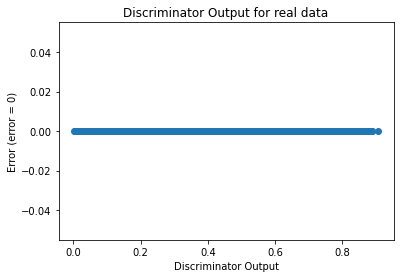

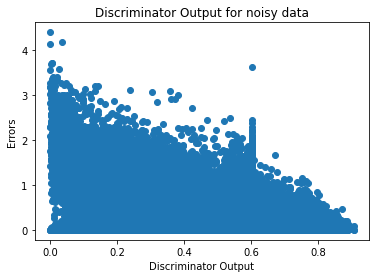

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
